In [37]:
import numpy as np # to utilize its linear algebra
import pandas as pd # for processing the .csv data file
import matplotlib.pyplot as plt # for data visualisation purposes
import seaborn as sns # statistical visualisation of data
import graphviz # graphviz takes description of graphs and data and constructs diagrams based off of that information

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score # Import scikit - learn metrics module to calculate accuracy
# (of the Decision Tree model built in this guide)
from sklearn import tree
import warnings
warnings.filterwarnings ('ignore')

In [38]:
df = pd.read_csv("D:\ML\Datasets\car_evaluation.csv", header = None)
# renaming column names
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]         
df.columns = col_names # assigning the above column names to the d a t a f r a m e s current columns
df.shape

(1728, 7)

In [39]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [40]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,4,med,high,unacc
freq,432,432,432,576,576,576,1210


#### Feature selection:

In [41]:
# splitting the dataset into features and target variable
feature_cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
X = df.drop(['class'], axis=1)
y = df['class'] # target variable

#### Splitting the dataset (X and Y) into training and testing set:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

#### Encoding variables with ordinal encoding:

In [43]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [44]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


#### Building Decision Tree model using Gini index

This function measures the quality of the split and the supported criteria are gini for the Gini impurity and entropy for inormfation gain; max_depth indicates to what extent the tree should expand so the default is none which would result in an output of a tree displayed that goes on until all leaves are pure. This guide specifies the max_depth to 4 therefore there are 4 branches in the final output:

In [45]:
# Create Decision Tree classifier object; clf refers to classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=0)

# Train Decision Tree Classifier
clf_gini.fit(X_train, y_train) # The fit method takes the training data as arguments and it estimates a best fit
# representation of the data points.

# Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

#### Evaluating the model:

In [46]:
# determining model accuracy i.e. how often is the classifier correct?
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9422


In [47]:
class_names=clf_gini.classes_
class_names

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

#### Visualizing the decision tree:

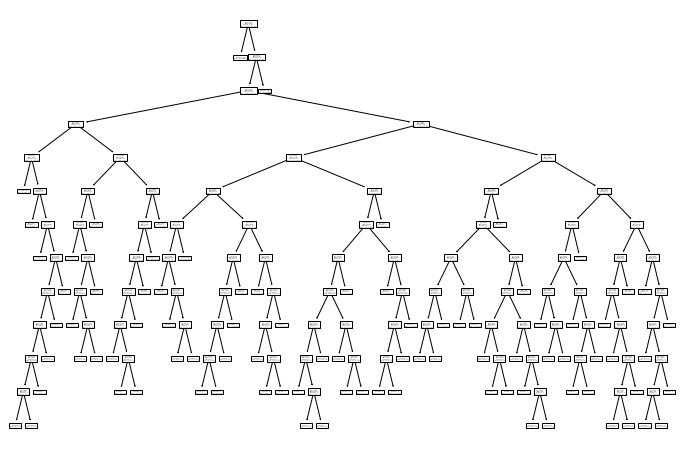

In [48]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

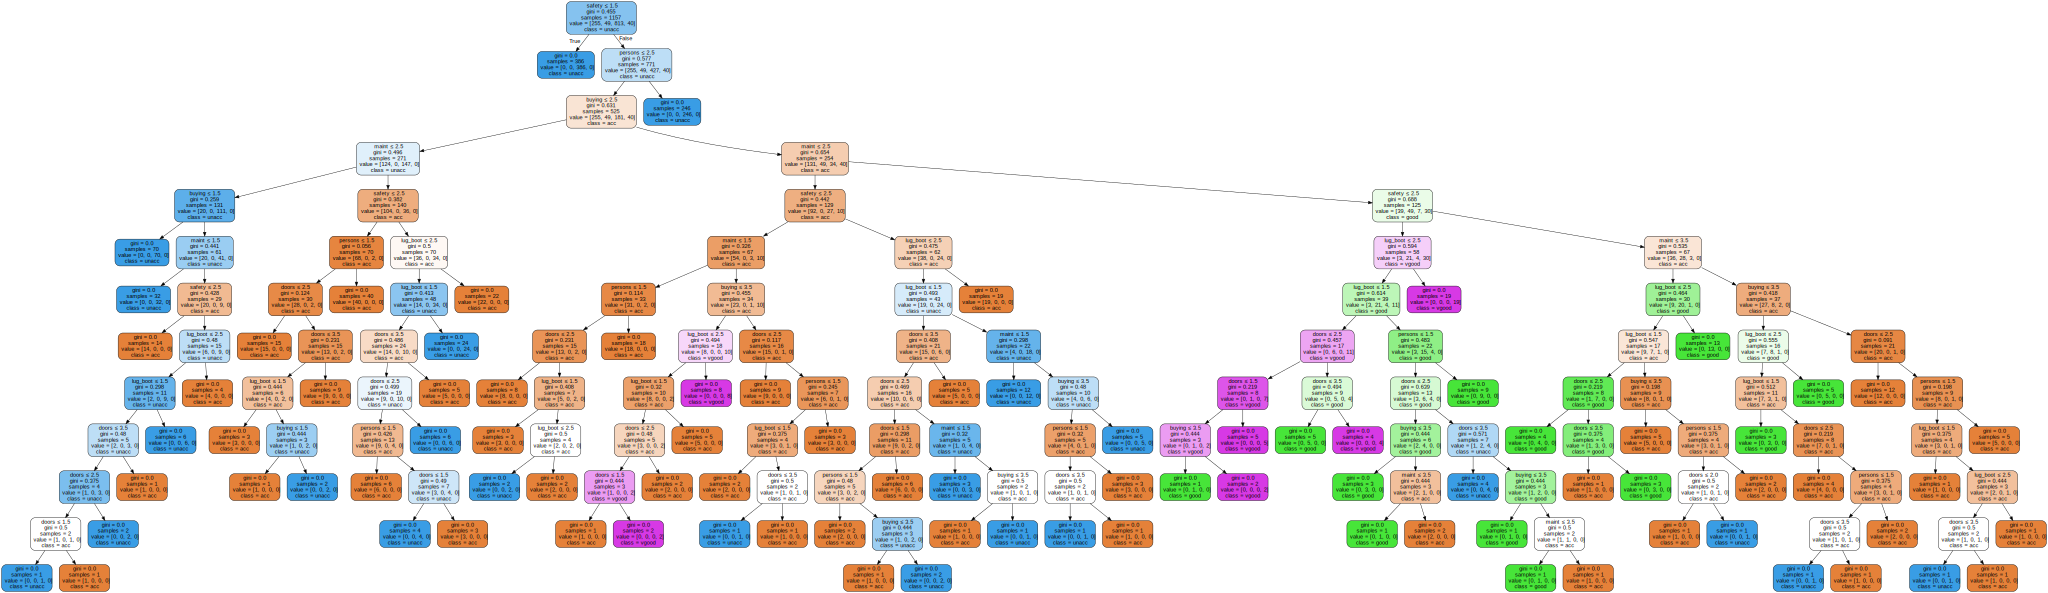

In [49]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_train.columns, class_names=class_names,
filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph